任务8内容：

* 完成第9章的学习，代码实现的过程上传到GitHub
* 作业3（选做）：https://www.kesci.com/home/project/58a943707159a710d916af15

DDL：20190824 22:00pm

# 第9章 绘图和可视化

## 9.1 matplotlib API入门

In [1]:
import numpy as np
import pandas as pd
# PREVIOUS_MAX_ROWS = pd.options.display.max_rows
# pd.options.display.max_rows = 20
# np.random.seed(12345)
import matplotlib.pyplot as plt
%matplotlib inline
%matplotlib notebook
import seaborn as sns
# plt.rc('figure', figsize=(10, 6))
# np.set_printoptions(precision=4, suppress=True)

一个简单的图形

In [2]:
data = np.arange(10)
data

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

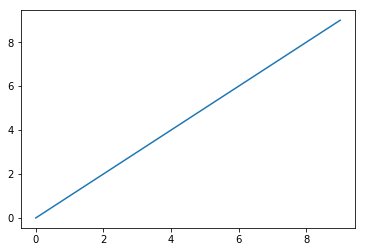

In [3]:
plt.plot(data)

### 9.1.1 Figure和Subplot

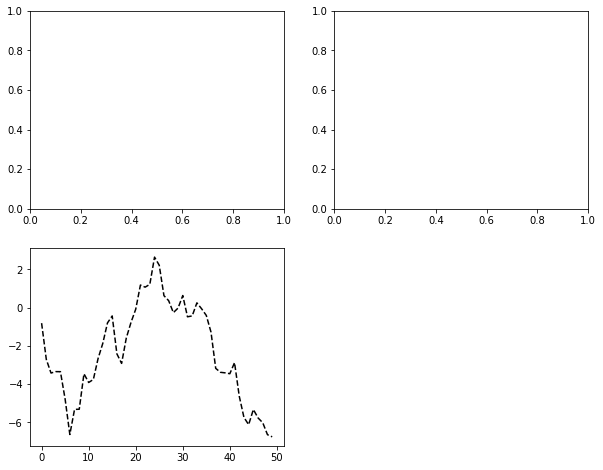

In [4]:
# 创建Figure对象（画布），可用figsize参数指定画布尺寸
fig = plt.figure(figsize=(10,8))
# 画图：add_subplot
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
# 在Jupyter Notebook中，对于复杂的图形，必须将所有的绘图命令放在同个代码块中
# 如果只有一个绘图命令，且没有创建subplot，就会在最后一个subplot里绘图
plt.plot(np.random.randn(50).cumsum(), 'k--')

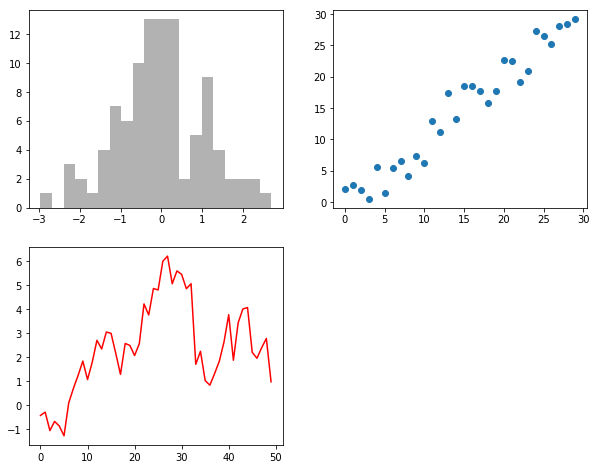

In [5]:
fig = plt.figure(figsize=(10,8))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
# 指定了subplot名称的不管顺序如何都会画在相应的位置
_ = ax1.hist(np.random.randn(100), bins=20, color='k', alpha=0.3)
ax2.scatter(np.arange(30), np.arange(30) + 3 * np.random.randn(30))
plt.plot(np.random.randn(50).cumsum(), color='r', linestyle='-')

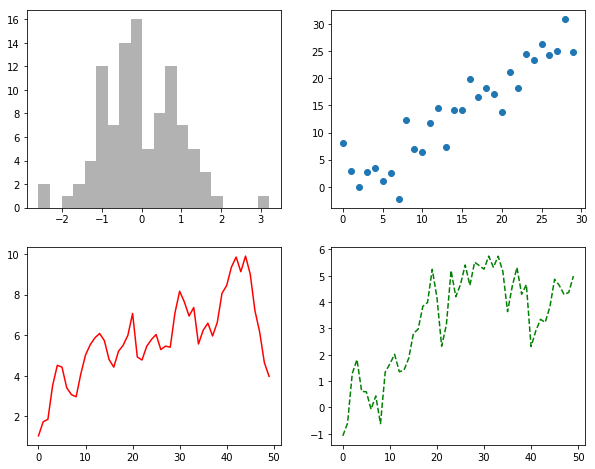

In [6]:
fig = plt.figure(figsize=(10,8))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)
# 指定了subplot名称的不管顺序如何都会画在相应的位置
_ = ax1.hist(np.random.randn(100), bins=20, color='k', alpha=0.3)
ax2.scatter(np.arange(30), np.arange(30) + 3 * np.random.randn(30))
plt.plot(np.random.randn(50).cumsum(), color='g', linestyle='--')
ax3.plot(np.random.randn(50).cumsum(), color='r', linestyle='-')

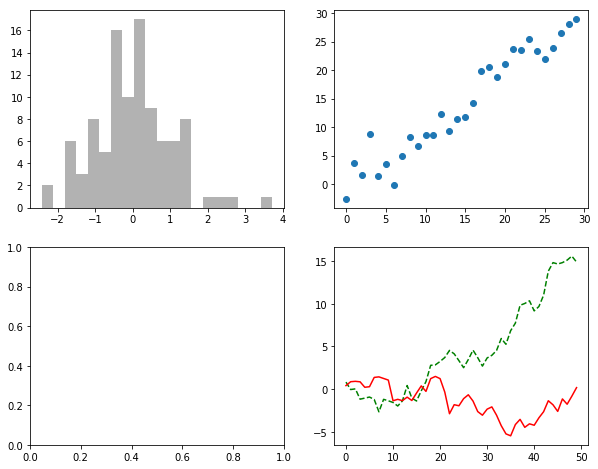

In [7]:
fig = plt.figure(figsize=(10,8))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)
# 指定了subplot名称的不管顺序如何都会画在相应的位置
# 如果有多于1张d额图没有指定subplot的名称，则无论有几个subplot，没有指定subplot名称的图都会全部画在最后一个subplot上
_ = ax1.hist(np.random.randn(100), bins=20, color='k', alpha=0.3)
ax2.scatter(np.arange(30), np.arange(30) + 3 * np.random.randn(30))
plt.plot(np.random.randn(50).cumsum(), color='g', linestyle='--')
plt.plot(np.random.randn(50).cumsum(), color='r', linestyle='-')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023B1B4BD080>,
      dtype=object)

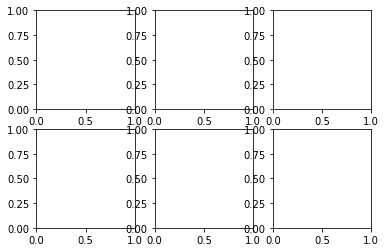

In [8]:
# 其他绘制subplot的方法
fig, axes = plt.subplots(2,3)
axes

In [9]:
?plt.subplot

### 9.1.2 调整subplot周围的间距

* plt.subplots_adjust(wspace=, hspace=)

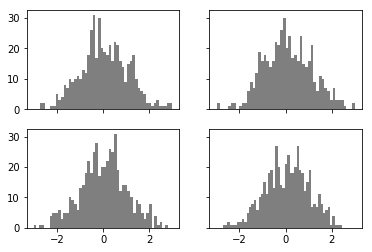

In [10]:
# 调整间距前
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
for i in range(2):
    for j in range(2):
        axes[i, j].hist(np.random.randn(500), 
                        bins=50, color='k', alpha=0.5)

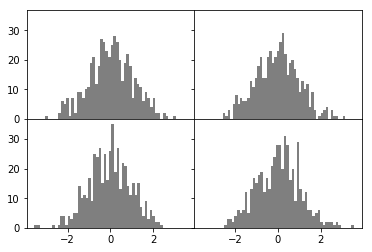

In [11]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
for i in range(2):
    for j in range(2):
        axes[i, j].hist(np.random.randn(500), 
                        bins=50, color='k', alpha=0.5)
# 调整间距后
plt.subplots_adjust(wspace=0, hspace=0)

### 9.1.3 颜色、标记和线型

In [12]:
# 同时指定颜色和线型
# ax,plot(x, y, 'g--')
# 相当于
# ax,plot(x, y, linestyle='--', color='green')

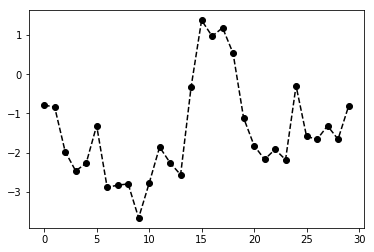

In [13]:
# 线型强调实际数据点
from numpy.random import randn
plt.plot(randn(30).cumsum(), 'ko--')
# 相当于
# plt.plot(randn(30).cumsum(), linestyle='--', color='k', maker='o')

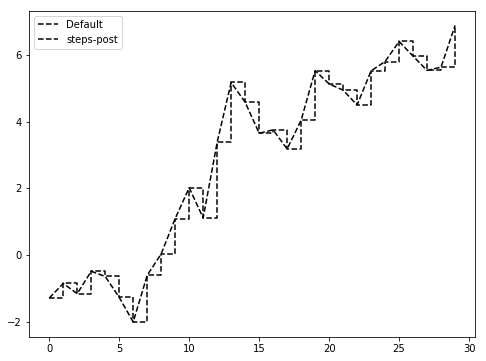

In [14]:
# 非实际数据点的线性方式插值
fig = plt.figure(figsize=(8,6))
data = np.random.randn(30).cumsum()
plt.plot(data, 'k--', label='Default')
plt.plot(data, 'k--', drawstyle='steps-post', label='steps-post')
plt.legend(loc='best') # 创建图例

### 9.1.4 刻度、标签和图例

* pyplot接口
    * plt.xlim()：控制刻度范围
    * plt.xticks()：控制刻度位置
    * plt.xticklabels()：控制刻度标签

* 原生matplotlib API（ax是某张subplot的坐标轴对象）
    * ax.get_xlim
    * ax_set_xlim

### 9.1.5 设置标题、轴标签、刻度以及刻度标签

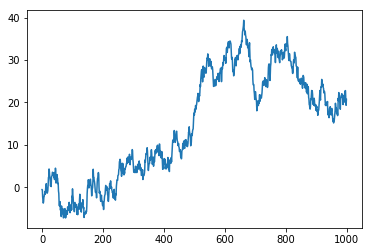

In [15]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(np.random.randn(1000).cumsum())

Text(0.5,0,'Stages')

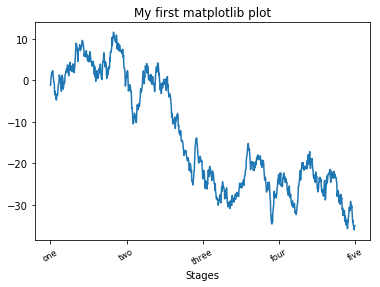

In [16]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(np.random.randn(1000).cumsum())
# 设置x轴刻度
ticks = ax.set_xticks([0, 250, 500, 750, 1000])
# 设置x轴刻度标签
labels = ax.set_xticklabels(['one', 'two', 'three', 'four', 'five'],
                           rotation=30, fontsize='small')
# 设置图片标题
ax.set_title('My first matplotlib plot')
# 设置x轴标签
ax.set_xlabel('Stages')

[Text(0.5,0,'Stages'), Text(0.5,1,'My first matplotlib plot')]

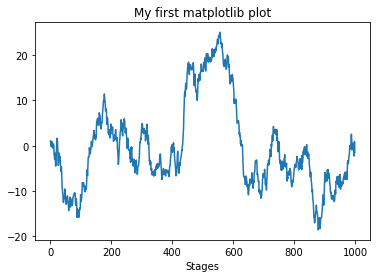

In [17]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(np.random.randn(1000).cumsum())
# 批量设置绘图选项
props = {
    'title': 'My first matplotlib plot',
    'xlabel': 'Stages'
}
ax.set(**props)

# Q: 如何批量s设置xticks, xticklabels, xlabels等等

In [18]:
?ax.set_xticklabels

In [19]:
?ax.set

### 9.1.6 添加图例

方法：
* 在添加subplot时出传入label参数：ax.plot(label=)
* 调用ax.legend()
* 调用plt.legend()

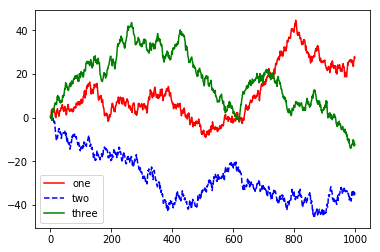

In [20]:
from numpy.random import randn
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(randn(1000).cumsum(), 'r', label='one')
ax.plot(randn(1000).cumsum(), 'b--', label='two')
ax.plot(randn(1000).cumsum(), 'g', label='three')
ax.legend(loc='best')

In [21]:
?ax.legend

### 9.1.7 注解以及在Subplot上绘图

注解方法：

* ax.text()
    * 例子：ax.text(x, y, 'Hello World!', family='monospace', fontsize=10)
* ax.annotate()


添加图形：

* 先创建plt.shp，然后ax.add_patch(shp)

**添加注解**

Text(0.5,1,'Important dates in the 2008- 2009 financial crisis')

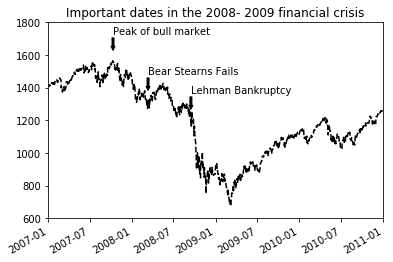

In [22]:
from datetime import datetime

fig = plt.figure() # 创建画布
ax = fig.add_subplot(1,1,1)

data = pd.read_csv('examples/spx.csv', index_col=0, parse_dates=True)
spx = data['SPX']

spx.plot(ax=ax, style='k--')

crisis_data = [
    (datetime(2007, 10, 11), 'Peak of bull market'),
    (datetime(2008, 3, 12), 'Bear Stearns Fails'),
    (datetime(2008, 9, 15), 'Lehman Bankruptcy')
]

for date, label in crisis_data:
    ax.annotate(label, xy=(date, spx.asof(date) + 75),
               xytext=(date, spx.asof(date) + 225),
               arrowprops=dict(facecolor='black', headwidth=4,
                              width=2, headlength=4),
               horizontalalignment='left',verticalalignment='top')

# zoom in on 2007-2010
ax.set_xlim(['1/1/2007', '1/1/2011'])
ax.set_ylim([600, 1800])

ax.set_title('Important dates in the 2008- 2009 financial crisis')

以下是关于以上代码的note：

note开始

In [23]:
?spx.plot

In [24]:
?ax.annotate

In [25]:
for date, label in crisis_data:
    print(date, spx.asof(date))

# 这是什么操作？？

2007-10-11 00:00:00 1554.41
2008-03-12 00:00:00 1308.77
2008-09-15 00:00:00 1192.7


series.asof(where, subset=None)

参数：
* where : 日期或日期数组 
* subset : 字符串或字符串列表，默认为None，如果不是None，则使用这些列进行NaN传播

意义：假如我有一组数据，某个点的时候这个值是NaN，那就求这个值之前最近一个不是NaN的值是多少，假如不是NaN，就取自己

In [26]:
data1 = pd.Series(np.arange(6),index = pd.date_range('6/12/2012',periods =6))
data1.loc['2012-6-14'] = None
data1

2012-06-12    0.0
2012-06-13    1.0
2012-06-14    NaN
2012-06-15    3.0
2012-06-16    4.0
2012-06-17    5.0
Freq: D, dtype: float64

In [27]:
data1.asof('2012-06-14')

1.0

In [28]:
data1.asof('2012-06-15')

3.0

In [29]:
type(crisis_data)

list

In [30]:
?pd.read_csv

note结束

**添加图形**

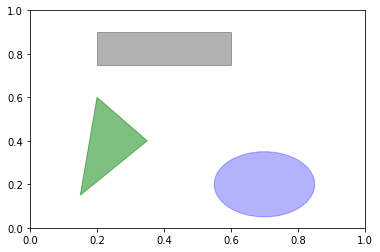

In [31]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
# 创建块对象shp
rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color='k', alpha=0.3) 
circ = plt.Circle((0.7, 0.2), 0.15, color='b', alpha=0.3) 
pgon = plt.Polygon([[0.15, 0.15], [0.35, 0.4], [0.2, 0.6]],color='g', alpha=0.5)
# 通过ax.add_pacth(shp)将shp对象添加到subplot中
ax.add_patch(rect) 
ax.add_patch(circ) 
ax.add_patch(pgon)

### 9.1.8 将图标保存到文件

* plt.savefig()

注意事项：
* 必须和画图的代码在同个代码块内，否则保存的是空白画布；
* 重要参数：
    * 文件路径、名称和类型
    * dpi，分辨率（默认100）
    * bbox_inches，图表周围的空白部分处理

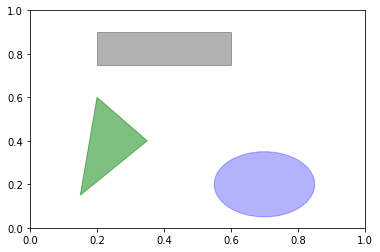

In [32]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
# 创建块对象shp
rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color='k', alpha=0.3) 
circ = plt.Circle((0.7, 0.2), 0.15, color='b', alpha=0.3) 
pgon = plt.Polygon([[0.15, 0.15], [0.35, 0.4], [0.2, 0.6]],color='g', alpha=0.5)
# 通过ax.add_pacth(shp)将shp对象添加到subplot中
ax.add_patch(rect) 
ax.add_patch(circ) 
ax.add_patch(pgon)

plt.savefig('./output_file/ch09fig.png', dpi=400, bbox_inches='tight')

### 9.1.9 matplotlib配置

In [33]:
# 全局配置
# plt.rc(<希望自定义的对象，如'figure'>, <关键字参数，如figsize=(10,10>)

## 9.2 使用pandas和seaborn绘图

### 9.2.1 线型图

In [34]:
plt.close('all')

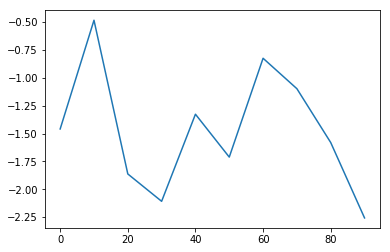

In [35]:
s = pd.Series(np.random.randn(10).cumsum(), 
              index = np.arange(0, 100, 10))
s.plot()
# 禁用索引
# s.plot(use_index=False)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000023B1B82F240>,
      dtype=object)

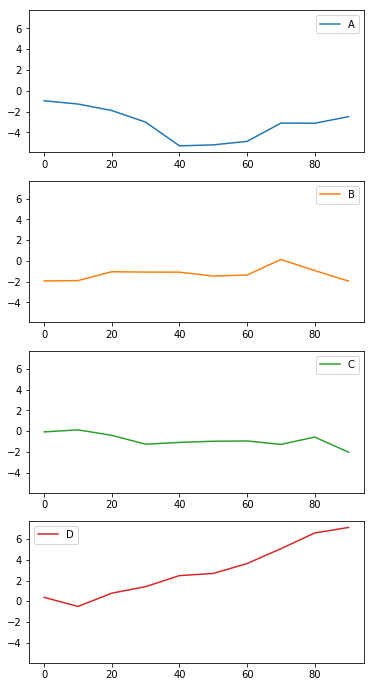

In [36]:
df = pd.DataFrame(np.random.randn(10, 4).cumsum(0),
                  columns=['A', 'B', 'C', 'D'],
                  index=np.arange(0, 100, 10))
df.plot(subplots=True, figsize=(6,12), sharey=True, sharex=False) 
# index被作为x轴刻度
# 多条线画在一张图上（默认）：
# df.plot(subplots=False) 

### 9.2.2 柱状图

* 垂直柱状图，索引作为X刻度：plot.bar()
* 水平柱状图，索引作为Y刻度：plot.barh()

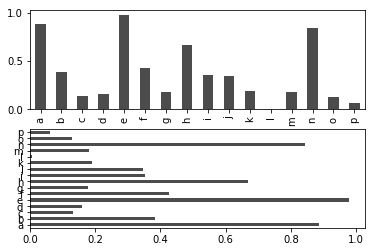

In [37]:
fig, axes = plt.subplots(2, 1)
data = pd.Series(np.random.rand(16), index=list('abcdefghijklmnop'))
# plot.bar()
data.plot.bar(ax=axes[0], color='k', alpha=0.7)
data.plot.barh(ax=axes[1], color='k', alpha=0.7)

In [38]:
np.random.seed(2018)
df = pd.DataFrame(np.random.rand(6, 4),
                  index=['one', 'two', 'three', 'four', 'five', 'six'],
                  columns=pd.Index(['A', 'B', 'C', 'D'], name='Genus'))
df

Genus,A,B,C,D
one,0.882349,0.104328,0.907009,0.306399
two,0.446409,0.589985,0.837111,0.697801
three,0.802803,0.107215,0.757093,0.999671
four,0.725931,0.141448,0.356721,0.942704
five,0.610162,0.227577,0.668732,0.692905
six,0.416863,0.171810,0.976891,0.330224


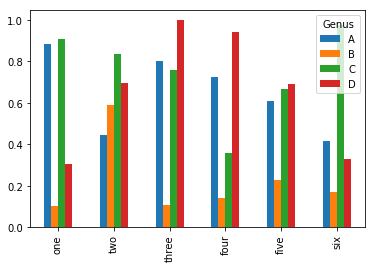

In [39]:
df.plot.bar()

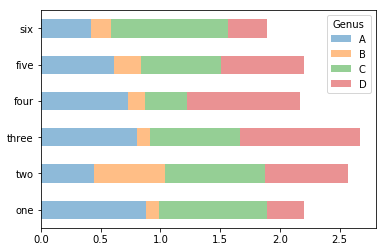

In [40]:
# 堆积柱状图：stacked=True
df.plot.barh(stacked=True, alpha=0.5)

利用频率画柱形图

In [41]:
tips = pd.read_csv('examples/tips.csv')

In [42]:
tips.head()

,total_bill,tip,smoker,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


In [43]:
party_counts = pd.crosstab(tips['day'], tips['size'])
party_counts

size,1,2,3,4,5,6
day,,,,,,
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1
Thur,1,48,4,5,1,3


In [44]:
# not many 1- and 6-person parties
party_counts = party_counts.loc[:, 2:5]

In [45]:
# normalize to sum to 1
party_pcts = party_counts.div(party_counts.sum(1), axis=0)
party_pcts

size,2,3,4,5
day,,,,
Fri,0.888889,0.055556,0.055556,0.000000
Sat,0.623529,0.211765,0.152941,0.011765
Sun,0.520000,0.200000,0.240000,0.040000
Thur,0.827586,0.068966,0.086207,0.017241


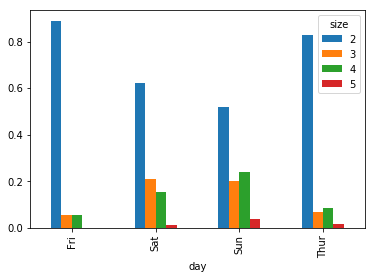

In [46]:
party_pcts.plot.bar()

In [47]:
import seaborn as sns

In [48]:
# 每天的小费占消费比例可视化
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips.head()

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.063204
1,10.34,1.66,No,Sun,Dinner,3,0.191244
2,21.01,3.50,No,Sun,Dinner,3,0.199886
3,23.68,3.31,No,Sun,Dinner,2,0.162494
4,24.59,3.61,No,Sun,Dinner,4,0.172069


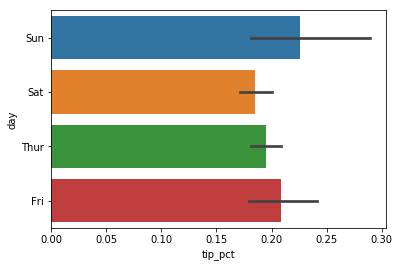

In [49]:
sns.barplot(x='tip_pct', y='day', data=tips, orient='h')
# 黑色线表示95%的置信区间

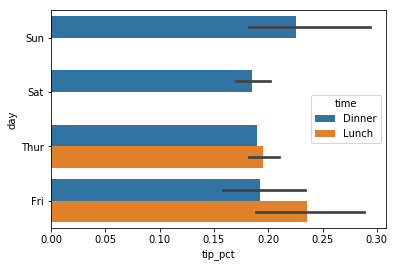

In [50]:
# 增加额外值的设置
sns.barplot(x='tip_pct', y='day', hue='time', data=tips, orient='h')

In [51]:
# 更换sns调色板
sns.set(style='whitegrid')

### 9.2.3 直方图和密度图

* 直方图：series.plot.hist(bins=)
* 密度图：series.plot.density()
* sns的直方+密度图：sns.distplot(values, bins=,)

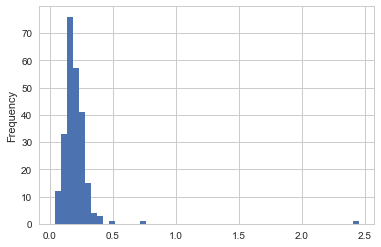

In [52]:
# series.plot.hist(bins=)
plt.figure()
tips['tip_pct'].plot.hist(bins=50)

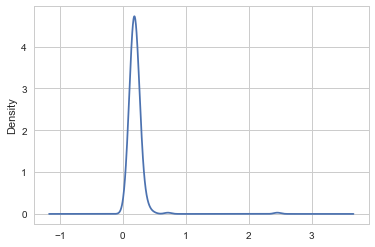

In [53]:
# series.plot.density()
plt.figure()
tips['tip_pct'].plot.density()

In [55]:
import warnings
warnings.filterwarnings("ignore")

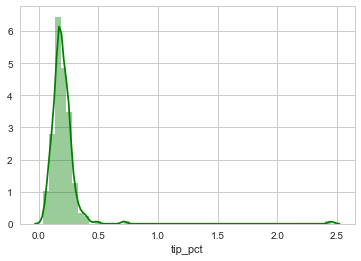

In [56]:
# sns.distplot(values, bins=,)
plt.figure()
sns.distplot(tips['tip_pct'], bins=50, color='g')

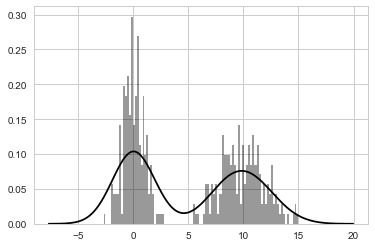

In [62]:
comp1 = np.random.normal(0, 1, size=200)
comp2 = np.random.normal(10, 2, size=200)
values = pd.Series(np.concatenate([comp1, comp2]))
sns.distplot(values, bins=100, color='k')

### 9.2.4 散布图或点图

* 散布图（散点+回归曲线）：sns.regplot()
* 散布图矩阵：sns.pairplot()
    * 散点图矩阵让我们看到了两个变量之间的关系，是识别后续分析趋势的好方法

In [63]:
macro = pd.read_csv('examples/macrodata.csv')
data = macro[['cpi', 'm1', 'tbilrate', 'unemp']]
trans_data = np.log(data).diff().dropna() # diff()函数默认axis=0，沿着0轴，n行减n-1行的值
trans_data[-5:]

,cpi,m1,tbilrate,unemp
198,-0.007904,0.045361,-0.396881,0.105361
199,-0.021979,0.066753,-2.277267,0.139762
200,0.002340,0.010286,0.606136,0.160343
201,0.008419,0.037461,-0.200671,0.127339
202,0.008894,0.012202,-0.405465,0.042560


Text(0.5,1,'Changes in log m1 versus log unemp')

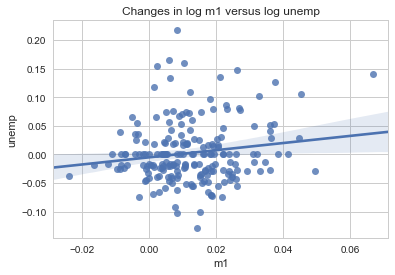

In [76]:
sns.regplot('m1', 'unemp', data=trans_data)
plt.title('Changes in log %s versus log %s' % ('m1', 'unemp'))

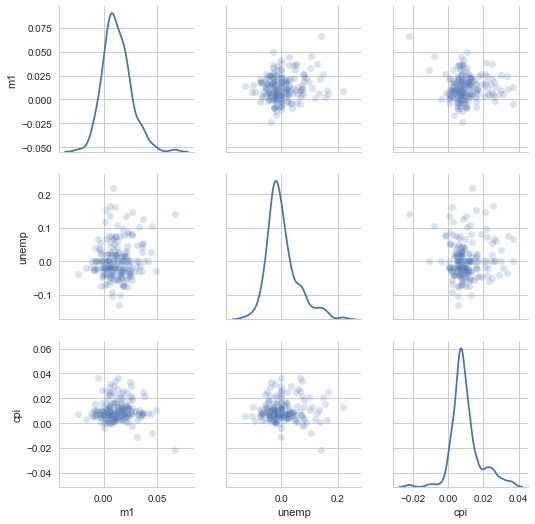

In [84]:
# 散点矩阵：sns.pairplot()
sns.pairplot(trans_data[['m1', 'unemp', 'cpi']], diag_kind='kde', plot_kws={'alpha':0.2})
# 取全部值：
# sns.pairplot(trans_data, diag_kind='kde', plot_kws={'alpha':0.2})

### 9.2.5 分面网络（facet grid）和类型数据

In [86]:
tips.head()

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.063204
1,10.34,1.66,No,Sun,Dinner,3,0.191244
2,21.01,3.50,No,Sun,Dinner,3,0.199886
3,23.68,3.31,No,Sun,Dinner,2,0.162494
4,24.59,3.61,No,Sun,Dinner,4,0.172069


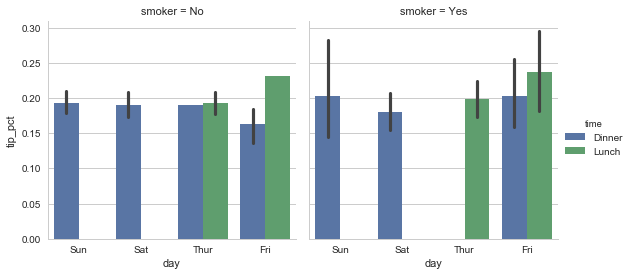

In [90]:
sns.factorplot(x='day', y='tip_pct', hue='time', col='smoker',
              kind='bar', data=tips[tips.tip_pct < 1])

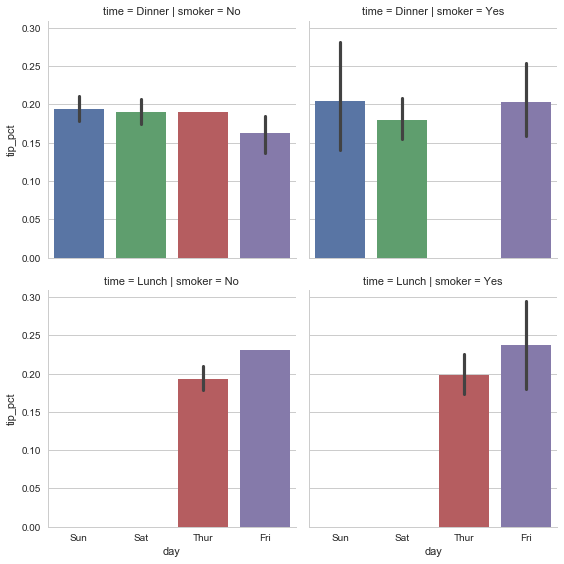

In [91]:
sns.factorplot(x='day', y='tip_pct', row='time', col='smoker',
              kind='bar', data=tips[tips.tip_pct < 1])

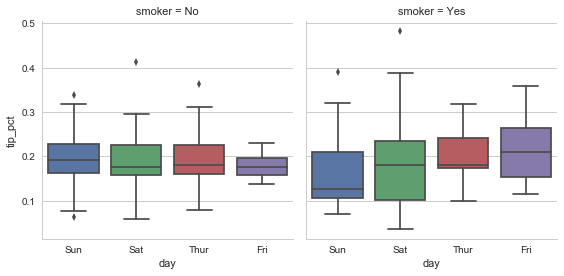

In [96]:
sns.factorplot(x='day', y='tip_pct',kind='box', col='smoker',
               data=tips[tips.tip_pct < 0.5])

## 9.3 其他的Python可视化工具